In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
auto_prices = pd.read_csv('Automobile price data _Raw_.csv')

def clean_auto_data(auto_prices):
    'Function to load the auto price dataset from a CSV file'
    import pandas as pd
    import numpy as np
    
    #Recode Names
    #Fix the column names so that the "-" become "_"
    cols = auto_prices.columns
    auto_prices.columns = [str.replace('-','_') for str in cols]
    
    #Treat the missing values and remove the rows with missing values as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak_rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis = 0, inplace = True)
    
    #Transform column data type
    #Convert some columns into numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
    
    return auto_prices
auto_prices = clean_auto_data(auto_prices)

print(auto_prices.columns)

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


In [3]:
#Exploring the dataset
auto_prices.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
auto_prices.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

In [5]:
#Use Describe to get summarized statistics related to the data
auto_prices.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
def count_unique(auto_prices, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(auto_prices[col].value_counts())
cat_cols = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 
            'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 
            'fuel_system']
count_unique(auto_prices, cat_cols)


For column make
toyota           32
nissan           18
honda            13
mitsubishi       13
mazda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
alfa-romero       3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64

For column fuel_type
gas       175
diesel     20
Name: fuel_type, dtype: int64

For column aspiration
std      159
turbo     36
Name: aspiration, dtype: int64

For column num_of_doors
four    112
two      81
?         2
Name: num_of_doors, dtype: int64

For column body_style
sedan          94
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

For column drive_wheels
fwd    116
rwd     71
4wd      8
Name: drive_wheels, dtype: int64

For column engine_location
front    192
rear    

### Visualizing Distributions 

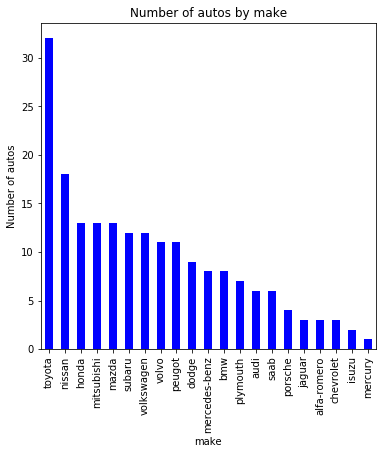

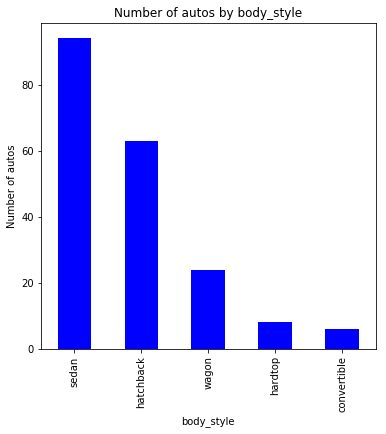

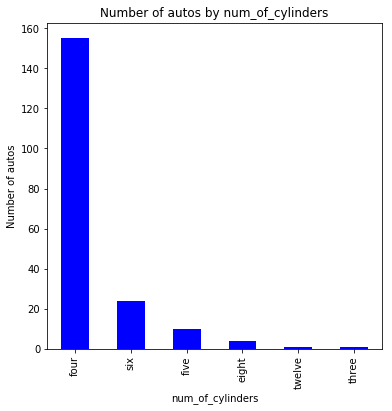

In [7]:
def plot_bars(auto_prices, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) #define plot area
        ax = fig.gca() #defines the axis
        counts = auto_prices[col].value_counts() #find the counts for each unique category
        counts.plot.bar(ax=ax, color = 'blue') #using the plot.bar method for counts dataframe
        ax.set_title('Number of autos by ' + col)#Main plot title
        ax.set_xlabel(col)
        ax.set_ylabel('Number of autos')
        plt.show()
plot_cols = ['make', 'body_style', 'num_of_cylinders']
plot_bars(auto_prices, plot_cols)

#### Histogram plots

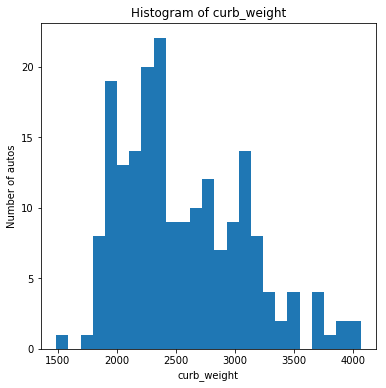

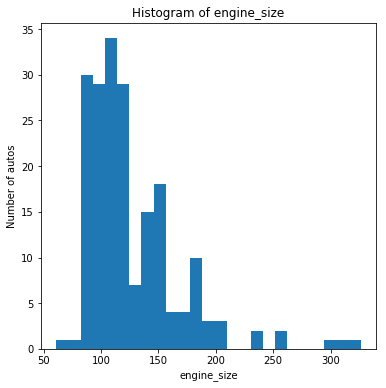

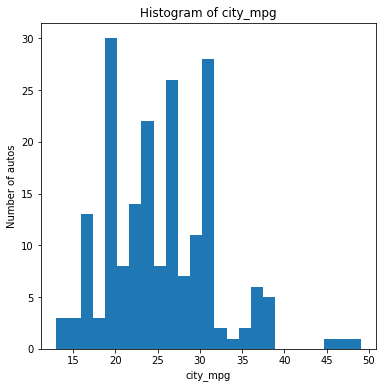

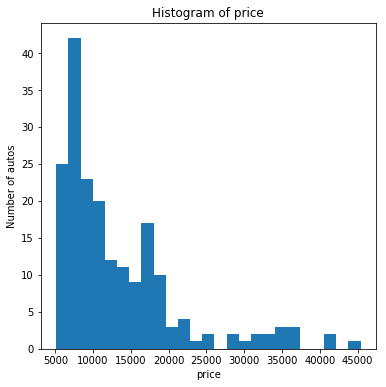

In [8]:
def plot_histogram(auto_prices, cols, bins = 25):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        auto_prices[col].plot.hist(ax = ax, bins = bins) # Use the plot.hist method on subset of the data frame
        ax.set_title('Histogram of ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()
        
num_cols = ['curb_weight', 'engine_size', 'city_mpg', 'price']    
plot_histogram(auto_prices, num_cols)

#### Kernel Density Plots with Seaborn

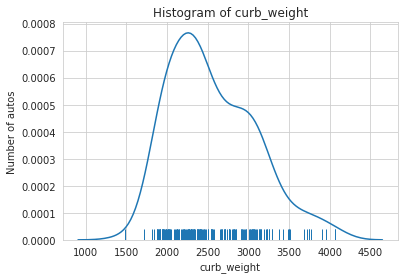

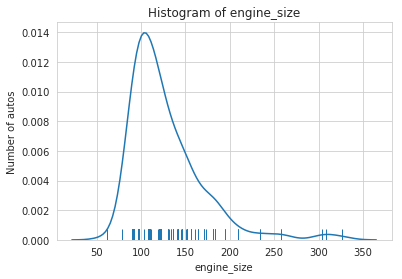

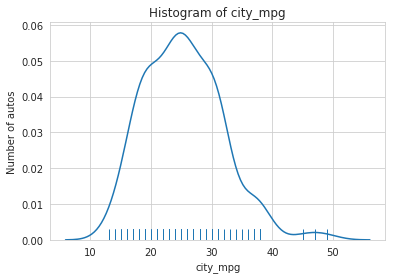

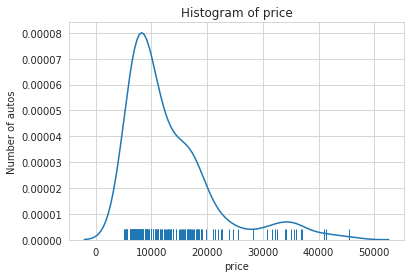

In [9]:
def plot_density_hist(auto_prices, cols, bins = 25, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(auto_prices[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of autos')# Set text for y axis
        plt.show()
        
plot_density_hist(auto_prices, num_cols)

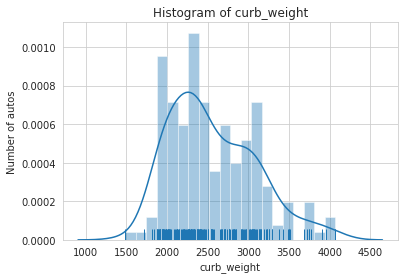

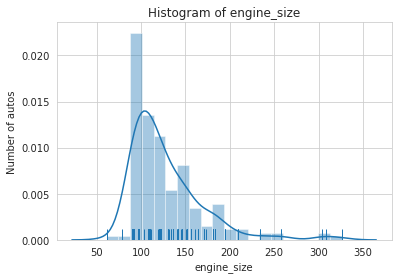

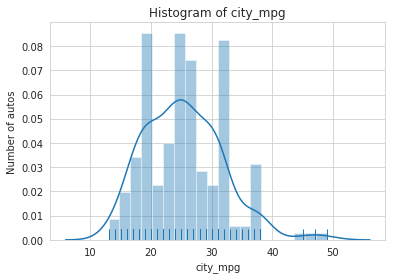

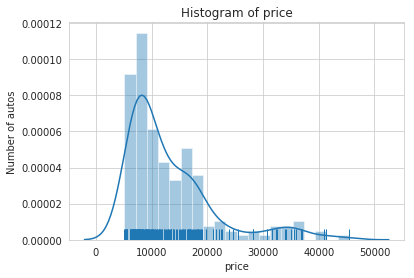

In [10]:
#Plot both histograms and KDEs together for clarity
plot_density_hist(auto_prices, num_cols, bins = 20, hist = True)

#### Scatter Plots

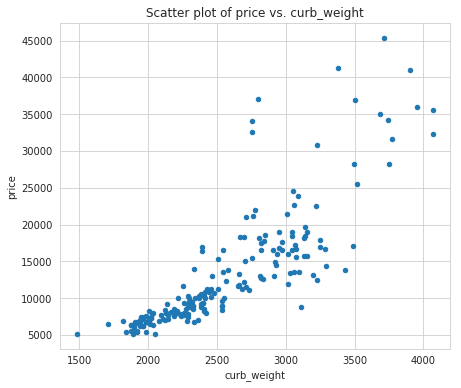

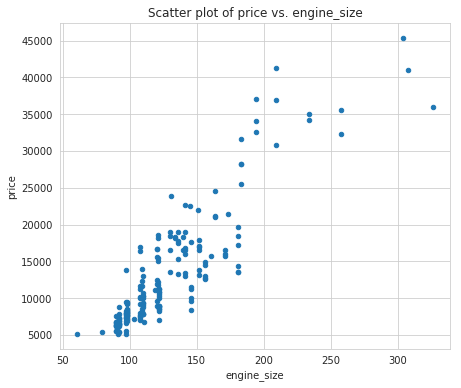

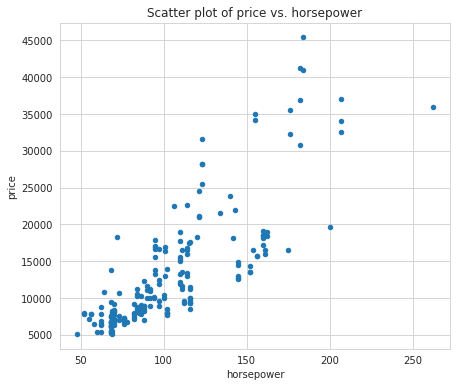

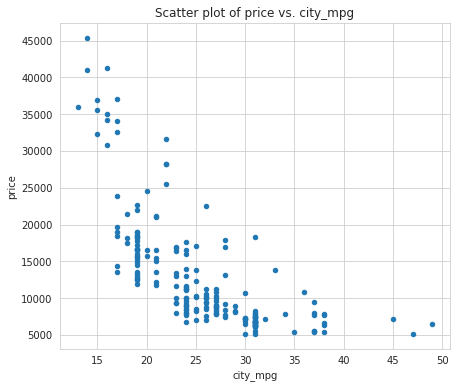

In [11]:
def plot_scatter(auto_prices, cols, col_y = 'price'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y
                     )# Set text for y axis
        plt.show()

num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter(auto_prices, num_cols)

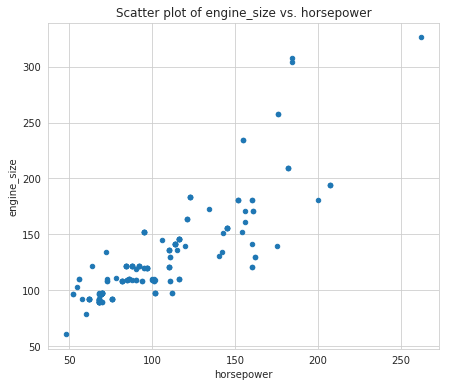

In [12]:
plot_scatter(auto_prices, ['horsepower'], 'engine_size')

__Deal with Overplotting__

The following types of plots can prove to be crucial in demonstrating multiple dimensions of data. 

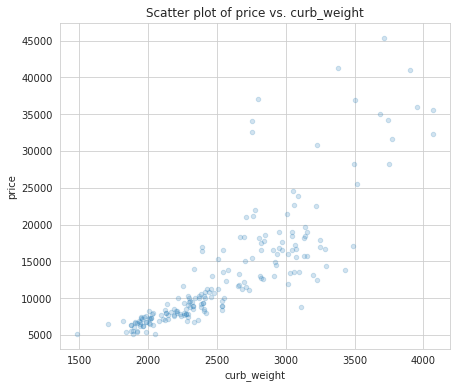

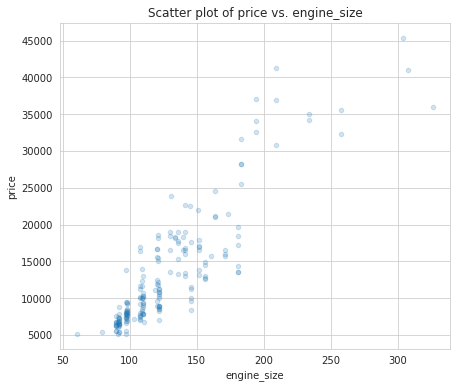

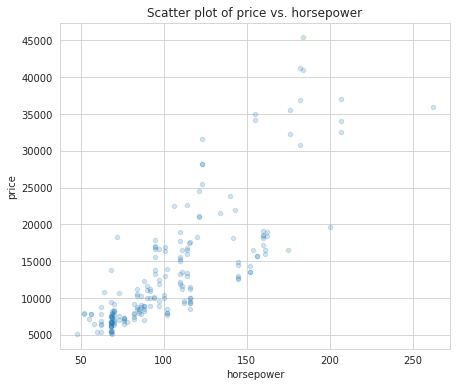

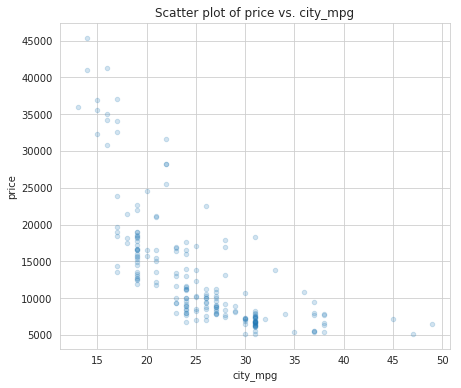

In [13]:
def plot_scatter_t(auto_prices, cols, col_y = 'price', alpha = 1.0):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        auto_prices.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

plot_scatter_t(auto_prices, num_cols, alpha = 0.2)

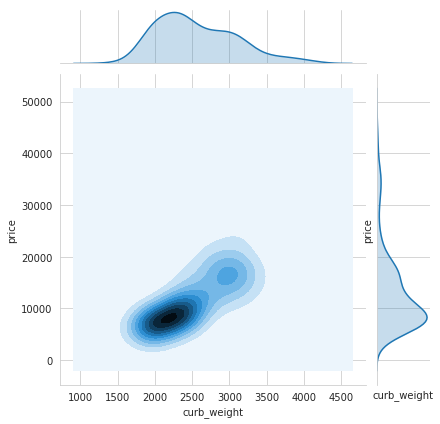

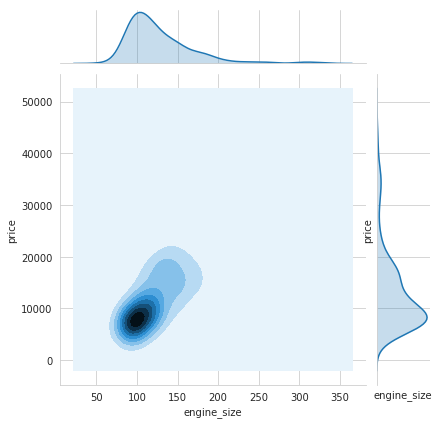

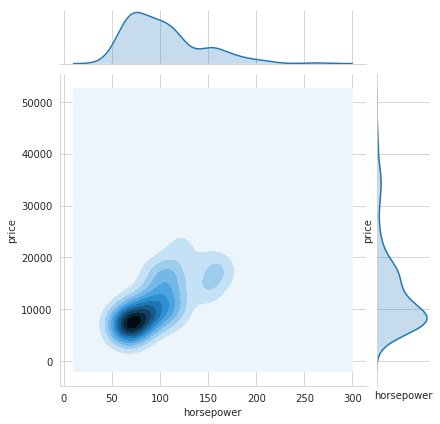

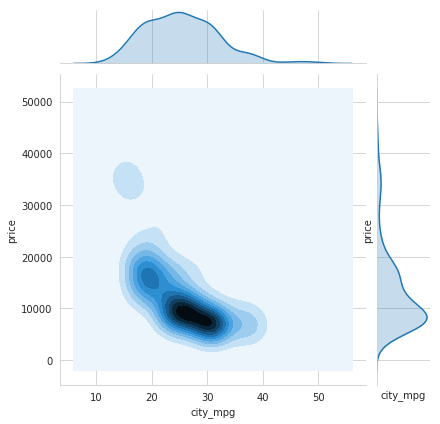

In [14]:
# CONTOUR PLOTS
def plot_desity_2d(auto_prices, cols, col_y = 'price', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=auto_prices, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_desity_2d(auto_prices, num_cols)

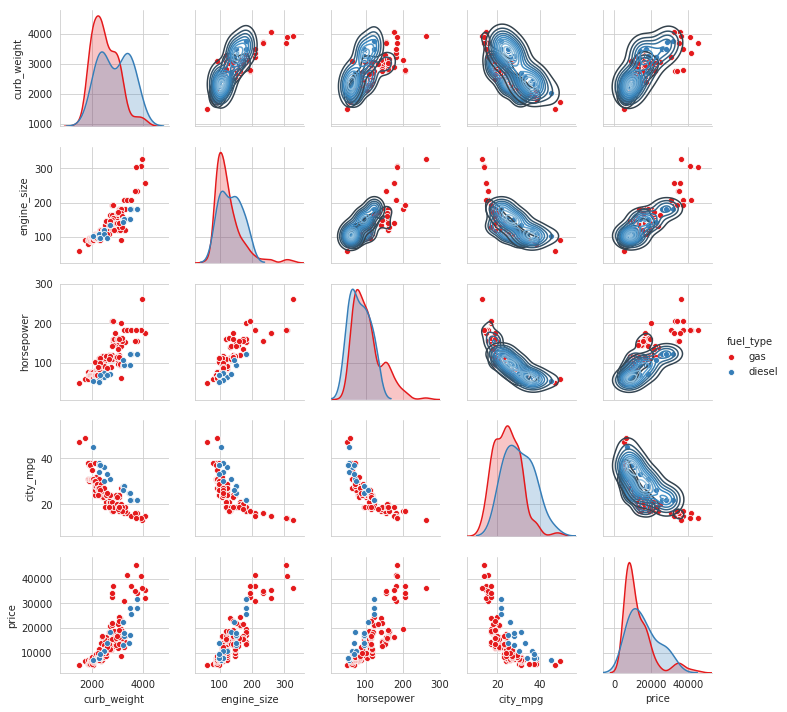

In [15]:
num_cols = ["curb_weight", "engine_size", "horsepower", "city_mpg", "price", "fuel_type"] 
sns.pairplot(auto_prices[num_cols], hue='fuel_type', palette="Set1", diag_kind="kde", height=2).map_upper(sns.kdeplot, cmap="Blues_d")

### Conditioned Plots 
Facet grid functions of Seaborn will define a grid over which the plots are displayed. 

'drive_wheels'

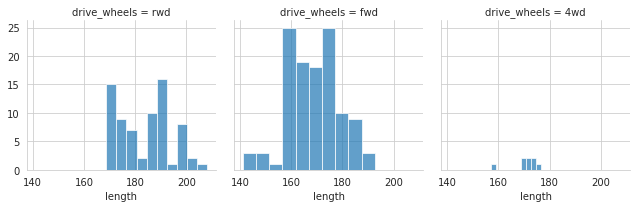

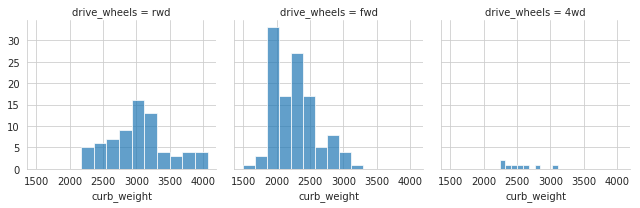

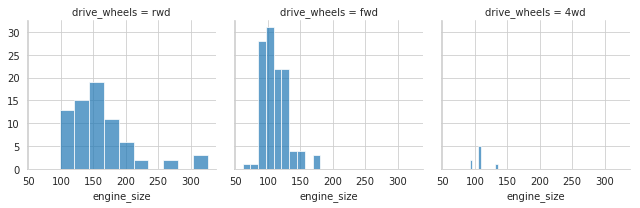

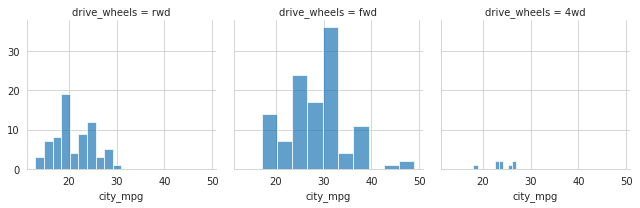

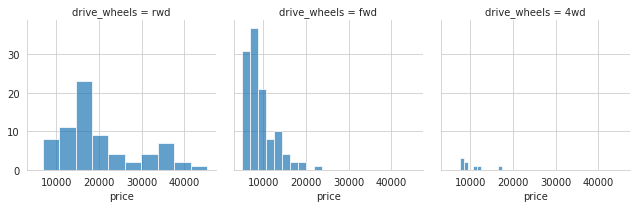

In [16]:
# Function to plot the conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over all columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

# Define columns for making a conditioned histogram
plot_cols2 = ["length", "curb_weight","engine_size","city_mpg","price"]

cond_hists(auto_prices, plot_cols2, 'drive_wheels')

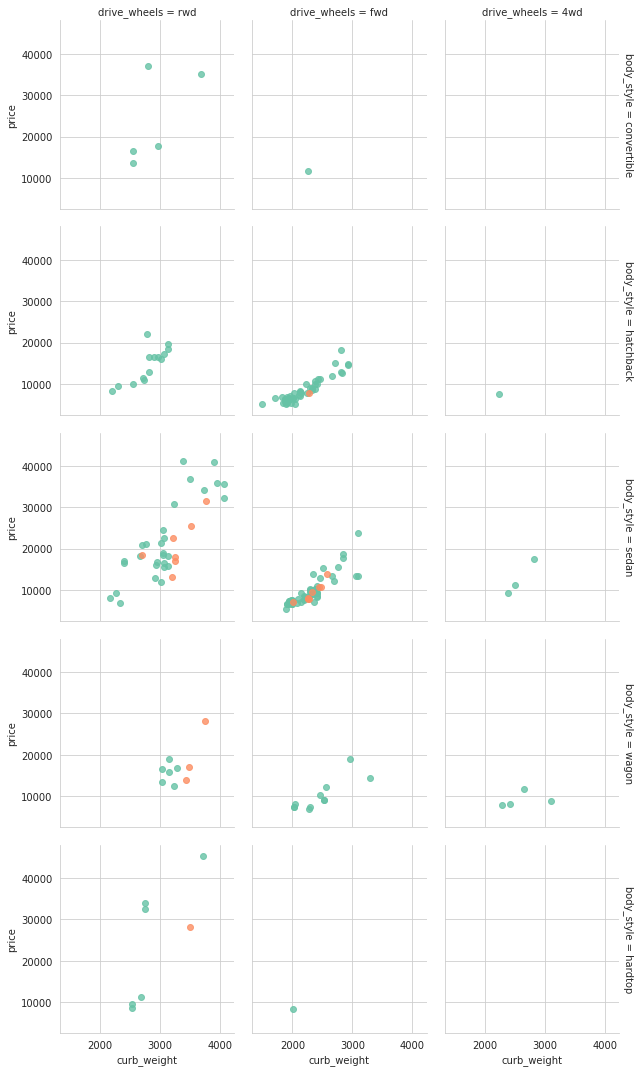

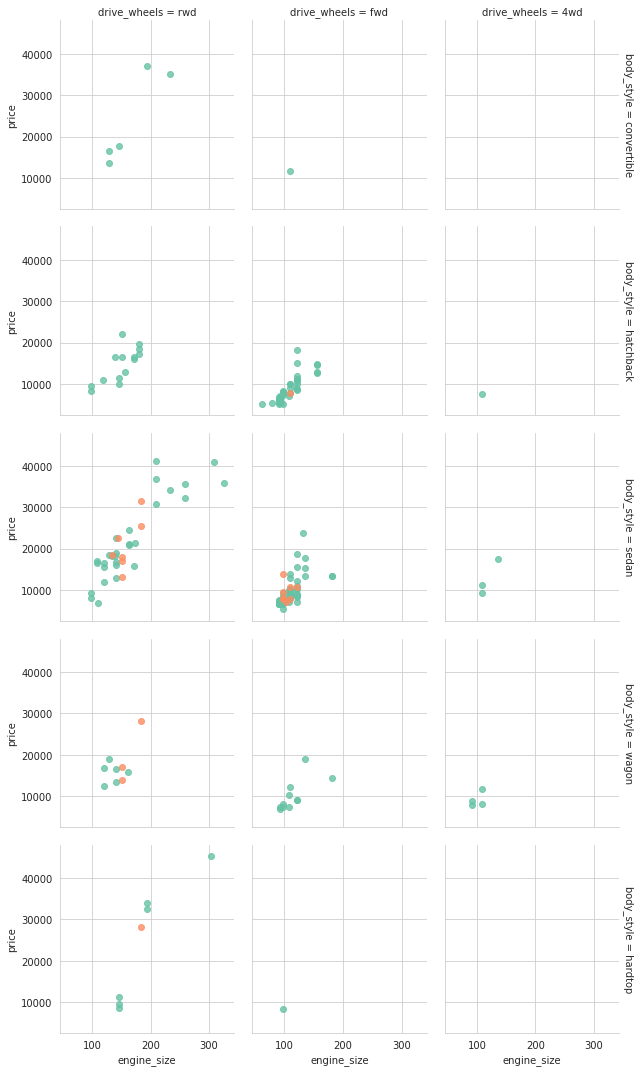

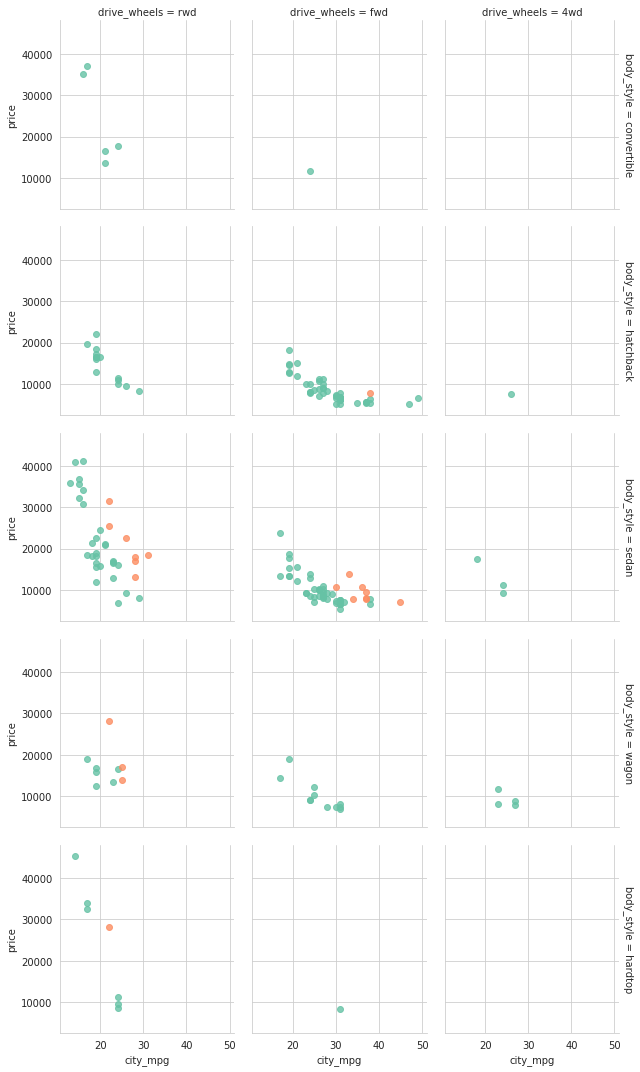

In [19]:
def cond_plot(cols):
    import ipywidgets
    import seaborn as sns
    for col in cols:
        g = sns.FacetGrid(auto_prices, col="drive_wheels", row = 'body_style', 
                      hue="fuel_type", palette="Set2", margin_titles=True)
        g.map(sns.regplot, col, "price",fit_reg=False)
num_cols = ["curb_weight", "engine_size", "city_mpg"]
cond_plot(num_cols)